# ENPH 213 - Week 3 Lab
In this lab, we will be working with Numerical Differentiation while continuing to develop your Python skills.

There is an accompanying file (ENPH213_Lab3_Hysteresis-Data.csv) that should be downloaded to the same folder as this notebook.  When you are finished, please rename this notebook to LastName_ENPH213_Lab3, where LastName is your last name.  Submit that file to onQ.

## Part 1


Write a function RichDeriv(f,x,h) that inputs a function $f$ of a single independent variable $x$ and 
calculates the derivative of the function using Richardson’s extrapolation formula:

$\large {\frac{df}{dx} = \frac{1}{3} \left[ 4 \left(\frac{f(x+h) - f(x-h)}{2h} \right) - \frac{f(x+2h) - f(x-2h)}{4h} \right]}$
  
Ensure that your code can work with $x$ as a vector input so that the your deriv function will then return a vector containing the derivatives at each point. 

Assume that you do not know what exact function you will use, but you know it will be some variation of a $\sin$ function.  Create an anonymous lambda function as a place holder of the form:

$\large A \sin (k x + \phi)$

Using the lambda function, define your function $f(x)$ such that $f(x) = 5 \sin (2x)$.  

To investigate how the accuracy of the derivative is influenced by the step size, plot the difference 
between the true value of the derivative and the numerically calculated values over the range of x values from $x=0$ to 
$ x= 2\pi$ in steps of $\pi /100$.  

Starting with $h = \pi/10$, and then increasing the denominator by 10 for each iteration, determine the optimal value for $h$.  Once the step size becomes too small, the accuracy of the calculation will begin to increase due to roundoff errors.  $h$ will be optimal when the error is no longer decreasing.  For a characteristic value of "the error", sum up the absolute values of all differences between the numerical derivative and the exact derivative.

Similar to the plot above, plot the difference between the numerical derivative and the exact derivative for your optimal value of $h$.  Make 2 more similar plots: one for $h_{optimal}$/2 and one for $h_{optimal}$/4.

**Q:** With each decrease in the step $h$ by a factor of 1/10, how does the error decrease and is it what you expect?  Briefly support your answer. 

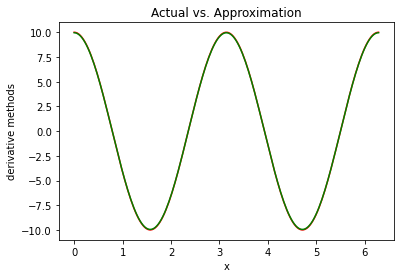

The optimal value for h will be:  0.0017167172970436028
The demoninator will be:  1830




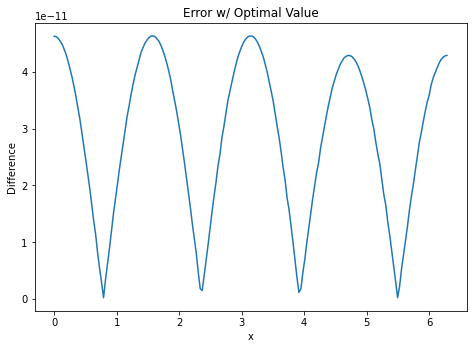

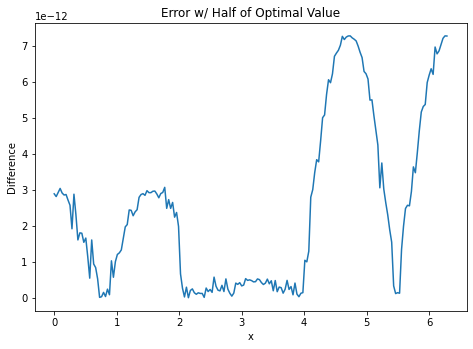

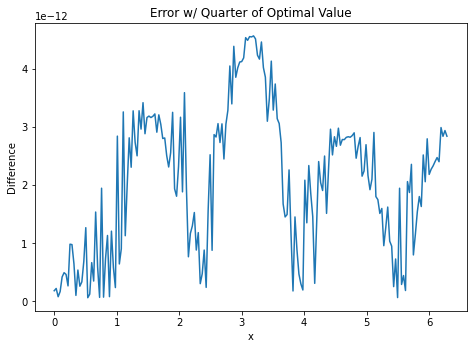

In [1]:
#Just importing needed libraries
import numpy as np
from scipy import constants
from matplotlib import cm
from matplotlib import pyplot as plt
%matplotlib inline

#Setting up the x array and original h value
x = np.linspace(0,2*np.pi,200)
hOrig = np.pi/10 #Initial point

#Derivative function using richardson approx.
def RichDeriv(f,x,h):
    term1 = (f(x+h) - f(x-h))/(2*h)
    term2 = (f(x+2*h) - f(x-2*h))/(4*h)
    fp = (1/3)*((4*term1) - term2)
    return fp

#Lambda function
def lambdaFunc(A,k,phi):
    return lambda x: A*np.sin((k*x)+phi)

#Actual derivative for comparison
def actualDerivative(x):
    return 10*np.cos(2*x)

#make my specific lambda function
funcUsed = lambdaFunc(5,2,0)
secondData = RichDeriv(funcUsed,x,hOrig)

#Plot the two data methods with the original h val
plt.plot(x,actualDerivative(x),'r')
plt.plot(x,secondData, 'g')
plt.title("Actual vs. Approximation")
plt.ylabel("derivative methods")
plt.xlabel("x")
plt.show()

#Time to determine the optimal denominator value for h
#This will be done using a while loop
i = 10
while 1:
    h = np.pi/i
    h1 = np.pi/(10+i)
    err1 = np.sum(abs(actualDerivative(x)-RichDeriv(funcUsed, x, h)))
    err2 = np.sum(abs(actualDerivative(x)-RichDeriv(funcUsed, x, h1)))
    if err2 > err1:
        break
    else:
        i = i+10
        
#Print out the optimized values
print("The optimal value for h will be: ", h)
print("The demoninator will be: ", i)
print("\n")

#PLot the error difference with the 3 required h vals
fig1 = plt.figure()
ax1 = fig1.add_axes([0,0,1,1])
ax1.plot(x, (abs(actualDerivative(x) - (RichDeriv(funcUsed, x, h)))))
ax1.set_title("Error w/ Optimal Value")
ax1.set_xlabel("x")
ax1.set_ylabel("Difference")
plt.show()

fig2 = plt.figure()
ax2 = fig2.add_axes([0,0,1,1])
ax2.plot(x, (abs(actualDerivative(x) - (RichDeriv(funcUsed, x, h/2)))))
ax2.set_title("Error w/ Half of Optimal Value")
ax2.set_xlabel("x")
ax2.set_ylabel("Difference")
plt.show()

fig3 = plt.figure()
ax3 = fig3.add_axes([0,0,1,1])
ax3.plot(x, (abs(actualDerivative(x) - (RichDeriv(funcUsed, x, h/4)))))
ax3.set_title("Error w/ Quarter of Optimal Value")
ax3.set_xlabel("x")
ax3.set_ylabel("Difference")
plt.show()

## Part 2

Load the data from "ENPH213_Lab3_Hysteresis-Data.csv".  This is similar to the data as was used in Lab 2.  Last lab, you calculated the area between the two curves, which corresponds to the strength of magnetization of a magnet.  The derivative of hysteresis curves can provide information on a magnet's coercivity, or the ability for a magnet to oppose an external magnetic field trying to change its magnetic field direction and demagnetize it.

Using the Forward Difference approximation, take the derivative of the two curves and plot the curves of $dv_y / dv_x$ as a function of $v_x$. Also, output the position ($v_x$) and value ($dv_y / dv_x$) for the two instances of maximum slope. [ Hint: use np.argmax() ]

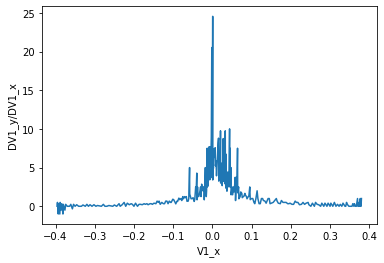

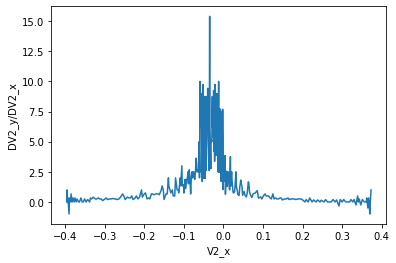

Max for plot 1 occurs at Vx:  0.0008 with derivative value:  24.5455
Max for plot 2 occurs at Vx:  -0.0348 with derivative value:  15.4000


In [2]:
#Load data from the .csv file
dataArray = np.loadtxt("ENPH213_Lab3_Hysteresis-Data.csv", delimiter=',', skiprows = 3)

#Getting 4 colums of V data
datavx1 = dataArray[:,0]
datavy1 = dataArray[:,1]
datavx2 = dataArray[:,2]
datavy2 = dataArray[:,3]

#Derivative function to use rise over run of the supplied data
def DerivativeDYDX(x,y):
    dvy = np.ones(len(x))
    #looping through every piece of data
    for i in range(0,len(x)-1):
        #Simply rise over run
        dvy[i] = (y[i+1]-y[i])/(x[i+1]-x[i])
    return dvy

#The two arrays of derivative data to be plotted
der1 = DerivativeDYDX(datavx1,datavy1)
der2 = DerivativeDYDX(datavx2,datavy2)

#Plotting the first figure
plt.figure(1)
plt.plot(datavx1,der1)
plt.ylabel("DV1_y/DV1_x")
plt.xlabel("V1_x")

#Plotting the second figure
plt.figure(2)
plt.plot(datavx2,der2)
plt.ylabel("DV2_y/DV2_x")
plt.xlabel("V2_x")

plt.show()

#Finding the max indexes with np.argmax
d1maxindex = np.argmax(der1)
d2maxindex = np.argmax(der2)

#Print the values of the maximuma
print("Max for plot 1 occurs at Vx: ", "%.4f" % datavx1[d1maxindex], "with derivative value: ", "%.4f"%der1[d1maxindex])
print("Max for plot 2 occurs at Vx: ", "%.4f" % datavx2[d2maxindex], "with derivative value: ", "%.4f"%der2[d2maxindex])

## Part 3

Write a function pDeriv(f,x,h) that inputs a function $f$ of up to three independent variables $x = (x1, x2, x3)$ and $h$-values $h = (h1, h2, h3)$, where the arrays have either 1, 2, or 3 elements depending on the dimension of the problem.  $x = (x1, x2, x3)$ will represent a single point, and the output of pderiv(f,x,h) should returns a 1-D array of the same size for each of the corresponding partial derivatives at that point.  Try to reuse the Richardson’s extrapolation you developed above to calculate the derivatives.  The function should check to see how many input arguments are used and return either 1, 2 or 3 partial derivatives accordingly.  Test you pderiv(f,x,h) function on the following:

$\large{ f_1(x) = x^2 \\
f_2(x,y) = x^2 y \\
f_3(x,y,z) = xy + z^2}$

My results: 

x=10; hx=0.1; pDeriv = 19.99999

x=4, y=3; hx=0.2, hy=0.3; pDeriv = [24, 16]

x=1, y=2, z=3; hx=hy=hz=0.1; pDeriv = [2, 1, 6]

Hints:

To create a 1-D array: np.array([1, 2, 3])

To find the size of an array: np.size(arr)



In [3]:
#This Function works analogous to the one in part 1, but allows you to take partial derivatives in 2D+ space    
def pDeriv(f, x, h):
    #1 Dimensional (dfx)
    if np.size(x) == 1:
        term1x = (f(x+np.array([h[0]])) - f(x-np.array([h[0]])))/(2*h[0])
        term2x = (f(x+2*np.array([h[0]])) - f(x-2*np.array([h[0]])))/(4*h[0])
        dfx = (1/3)*((4*term1x) - term2x)
        return dfx
    
    #2 Dimensional (dfx,dfy)
    if np.size(x) == 2:
        term1x = (f(x+np.array([h[0],0])) - f(x-np.array([h[0],0])))/(2*h[0])
        term2x = (f(x+2*np.array([h[0],0])) - f(x-2*np.array([h[0],0])))/(4*h[0])
        dfx = (1/3)*((4*term1x) - term2x)
        
        term1y = (f(x+np.array([0,h[1]])) - f(x-np.array([0,h[1]])))/(2*h[1])
        term2y = (f(x+2*np.array([0,h[1]])) - f(x-2*np.array([0,h[1]])))/(4*h[1])
        dfy = (1/3)*((4*term1y) - term2y)
        return [dfx, dfy]

    #3 Dimensional (dfx,dfy,dfz)
    if np.size(x) == 3:
        term1x = (f(x+np.array([h[0],0,0])) - f(x-np.array([h[0],0,0])))/(2*h[0])
        term2x = (f(x+2*np.array([h[0],0,0])) - f(x-2*np.array([h[0],0,0])))/(4*h[0])
        dfx = (1/3)*((4*term1x) - term2x)
    
        term1y = (f(x+np.array([0,h[1],0])) - f(x-np.array([0,h[1],0])))/(2*h[1])
        term2y = (f(x+2*np.array([0,h[1],0])) - f(x-2*np.array([0,h[1],0])))/(4*h[1])
        dfy = (1/3)*((4*term1y) - term2y)
        
        term1z = (f(x+np.array([0,0,h[2]])) - f(x-np.array([0,0,h[2]])))/(2*h[2])
        term2z = (f(x+2*np.array([0,0,h[2]])) - f(x-2*np.array([0,0,h[2]])))/(4*h[2])
        dfz = (1/3)*((4*term1z) - term2z)
        return [dfx, dfy, dfz]

#Three functions used to output f values
def f1(x):
    return x**2

def f2(x):
    return (x[0]**2)*x[1]

def f3(x):
    return x[0]*x[1]+(x[2]**2)

#Values for testing
x1 = np.array([10])
h1 = np.array([0.1])

x2 = np.array([4,3])
h2 = np.array([0.2,0.3])

x3 = np.array([1,2,3])
h3 = np.array([0.1,0.1,0.1])

#Print statements to test
print(pDeriv(f1,x1,h1))
print(pDeriv(f2,x2,h2))
print(pDeriv(f3,x3,h3))


[20.]
[24.0, 15.999999999999986]
[1.9999999999999898, 0.9999999999999964, 6.000000000000004]


## Part 4

Expand the pDeriv(f,x,h) function from Part 3 so that it can process a 2-D array of points, where $3 \leq x \leq 4$ with hx = 0.2 and $2 \leq y \leq 3$ with hy = 0.2. Write a function that can take the partial derivatives of $f_2$ at each of the 36 points in this range. Note that at each point, you should have two values associated with the partial derivative is each direction.  Check the results of individual points using your successful function from above.

A FOR loop would be accepted for this part, but you may also try to write a vectorized version that performs calculations directly on arrays. 

In [4]:
#Creating 1D and 2D arrays
x = np.linspace(3,4,6)
y = np.linspace(2,3,6)
X,Y = np.meshgrid(x,y)
h = 0.2

#Values to be passed into the function below
xPrime = (X,Y)
hPrime = (h,h)

#Function to evaluate the partial derivatives of a 2D array
def pDerivNew(f,x,h):
    finalData = np.ones((len(x), len(x[0])))
    #Double loop to go in both directions
    for i in range(len(x[1])):
        for j in range(len(x[1])):
            temporary = np.array([x[0][i][j],x[1][i][j]])
            printVal = pDeriv(f,temporary,h)
            printValRound = np.round(np.array(printVal),1)
            print(printValRound)
    return

#Print
print("The gradient of the array is: ")
pDerivNew(f2,xPrime,hPrime)

The gradient of the array is: 
[12.  9.]
[12.8 10.2]
[13.6 11.6]
[14.4 13. ]
[15.2 14.4]
[16. 16.]
[13.2  9. ]
[14.1 10.2]
[15.  11.6]
[15.8 13. ]
[16.7 14.4]
[17.6 16. ]
[14.4  9. ]
[15.4 10.2]
[16.3 11.6]
[17.3 13. ]
[18.2 14.4]
[19.2 16. ]
[15.6  9. ]
[16.6 10.2]
[17.7 11.6]
[18.7 13. ]
[19.8 14.4]
[20.8 16. ]
[16.8  9. ]
[17.9 10.2]
[19.  11.6]
[20.2 13. ]
[21.3 14.4]
[22.4 16. ]
[18.  9.]
[19.2 10.2]
[20.4 11.6]
[21.6 13. ]
[22.8 14.4]
[24. 16.]


## Part 5

For the function

$\large f(x, y) = \frac{1}{10^{x^2+Y^2}} \cos(\pi x - \pi/3)$

Plot the function on a surface plot for $ -1 \leq x, y \leq 1$ and each having a step size of 0.1.  This will help to visualize the shape of the function to compare the derivatives.

Then compute the partial derivatives in both directions for the function using a step size of 0.01.  This is, effectively, the gradient field of the function where

$\large \vec\nabla f = \frac{\partial f}{\partial x} \hat x + \frac{\partial f}{\partial y} \hat y $

You can plot the partial derivatives in a Quiver plot.  After setting up 2D axes similar to a normal graph, use the function:

q = ax.quiver(X, Y, Px, Py)

where X, and Y are 1-D arrays for the x and y spacing, and Px and Py are the 2-D arrays for the partial derivatives for each point on the grid in the x and y directions.


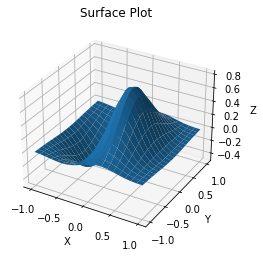

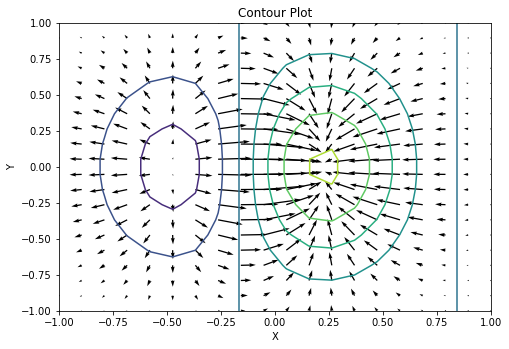

In [5]:
from mpl_toolkits.mplot3d import Axes3D

#h is the step size
h = 0.01
xRange = np.linspace(-1,1,20)
yRange = np.linspace(-1,1,20)

#Making them 2D
X, Y = np.meshgrid(xRange, yRange)

#Defining the function
def func(x,y):
    return (1/(10**(x**2+y**2)))*np.cos(np.pi*x-np.pi/3)

#Plotting the surface plot
fig3D = plt.figure()
ax3D = fig3D.add_subplot(111, projection='3d')
ax3D.plot_surface(X,Y,func(X,Y))
ax3D.set_xlabel("X")
ax3D.set_ylabel("Y")
ax3D.set_zlabel("Z")
ax3D.set_title("Surface Plot")


#Plotting the contour
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
contr = plt.contour(X,Y,func(X,Y))
ax.set_title("Contour Plot")
ax.set_xlabel("X")
ax.set_ylabel("Y")

#Now, time to compute the gradient of the function (using the forward difference quotient)
def GradDiff(f,x,y,h):
    GradX1 = np.ones(len(x))
    GradY1 = np.ones(len(y))
    
    #Make 2D
    GradX = np.outer(GradX1,GradX1)
    GradY = np.outer(GradY1,GradY1)
    
    #Double loop computing the two directional derivatives 
    for i in range(0,len(xRange)):
        for j in range(0,len(yRange)):
            GradX[i][j] = (f(x[i][j]+h, y[i][j]) - f(x[i][j],y[i][j]))/h
            GradY[i][j] = (f(x[i][j], y[i][j]+h) - f(x[i][j],y[i][j]))/h
    
    return [GradX,GradY]

#Make the quiver array (I added the contour plot underneath to visualize the locations)
QuiverGrad = GradDiff(func,X,Y,h)
q = ax.quiver(X,Y,QuiverGrad[0],QuiverGrad[1])

## Part 6

The electric potential V at location $\vec r = x \hat x + y \hat y + z \hat z$ due to a point charge $q$ at the origin is given by the expression: 

$\large V = \frac{q}{4 \pi \varepsilon_o} \frac{1}{r}$,

where $r = |\vec r |$

Write a function $V$ that evaluates the voltage at (x,y,z). To keep the numbers simple, let $q = 4 \pi \varepsilon_o$.

The electric field can be calculated by evaluating the gradient of the electric potential:  

$\large \vec E = - \frac{\partial V}{\partial x} \hat x - \frac{\partial V}{\partial y} \hat y - \frac{\partial V}{\partial z} \hat z$


 
Write a function Egrad(V,x,y,z) that inputs your voltage function $V$ and the field coordinates $(x,y,z)$ and returns the $x$,$y$, and $z$ components of the electric field ($E_x$,$E_y$,$E_z$). Check your answer by 
writing a second function Coloumb(x,y,z) that evaluates the electric field directly using Coloumb’s law. 

$\large \vec E = \frac{q \hat r}{4 \pi \varepsilon_o} \frac{1}{r^2}$


In [12]:
#Unit Vectors
xHat = [1,0,0]
yHat = [0,1,0]
zHat = [0,0,1]

#V function that essentially returns the magnitude of the r vector at a point
def V(x,y,z):
    r = [x,y,z]
    rMag = np.linalg.norm(r)
    return 1/rMag

#Function that returns the gradient through a calculation using chain rule
def EGrad(f,x,y,z):
    potential = f(x,y,z)
    pX = -x*(potential**3)
    pY = -y*(potential**3)
    pZ = -z*(potential**3)
    E = [-pX,-pY,-pZ]
    return E
    
#Coulomb version to test accuracy
def Coulomb(x,y,z):
    #Making the r vector and its associated unit vector
    r = np.inner(x,xHat) + np.inner(y,yHat) + np.inner(z,zHat)
    rMag = np.sqrt(x**2+y**2+z**2)
    rHat = r/rMag
    
    #Calculate E
    E = rHat/(rMag**2)
    
    #Calculate the 3 components
    Ex = np.inner(E,xHat)
    Ey = np.inner(E,yHat)
    Ez = np.inner(E,zHat)
    return [Ex,Ey,Ez]
    
#Make x,y,z
x = 1
y = 2
z = 3

#Print the values
print(EGrad(V,x,y,z))
print(Coulomb(x,y,z))

[0.019090088708030317, 0.03818017741606063, 0.057270266124090946]
[0.019090088708030313, 0.038180177416060626, 0.05727026612409094]


## Acknowledgements

Please comment on any help that you received from your group members or others concerning this Lab assignment.